# ** BBC News Article Classification**

**Goal:** This project involves classifying BBC news articles into one of five categories (business, sports, politics, technology, or entertainment). You will be expected to clean and preprocess the data, perform exploratory analysis, and build a machine learning or deep learning model for text classification making it a multiclass classification problem.

**Dataset:** The BBC News Dataset contains 1491 articles from the BBC news website corresponding to stories in five topical areas from 2004-2005. The articles are categorized into five topics: business, sports, politics, technology, and entertainment.

### **Step 1: Data Preprocessing**
1. Read Data

*   Load the dataset using library pandas
*   Check null values and duplicates




2. Data Cleaning

*   Convert all text to lowercase.
*   Remove punctuation, special characters, and extra whitespaces.
*   Tokenize the text into individual words.
*   Remove stop words using NLTK.
*   Apply lemmatization.



3. Categorical Overview

*   Analyze and count the number of articles in each category (business,sports, politics, technology, entertainment).

In [13]:
import nltk
nltk.download('stopwords') 

import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Load data
data = pd.read_csv(r"D:\TPCS2\project1\BBC news\BBC News.csv")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hamza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [14]:
# checking null values 
# adopted from the exam
missing_values = data.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values[missing_values > 0])
assert missing_values.sum() == 0
print("✅ No missing values found!")
print(missing_values)


Missing Values in Each Column:
Series([], dtype: int64)
✅ No missing values found!
ArticleId    0
Text         0
Category     0
dtype: int64


In [15]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f'Total Duplicates: {duplicates}')

# Remove duplicates
# data = data.drop_duplicates()
data.head()

Total Duplicates: 0


,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [5]:
data.columns

Index(['ArticleId', 'Text', 'Category'], dtype='object')

In [16]:
# Clean text function
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and symbols
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    return text

# Change the following line to reflect the actual column name
data['cleaned_text'] = data['Text'].apply(clean_text)  # Now clean_text is defined before being called

# Remove stopwords a0nd lemmatize
# "stopwords" is words that will not affect the classifying of the data, like: is, that... ,we only kare of the keywords to classify the data.
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
    return ' '.join(tokens)

data['processed_text'] = data['cleaned_text'].apply(preprocess_text)


C:\Users\hamza\AppData\Local\Temp\ipykernel_16352\222226812.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='Set2')


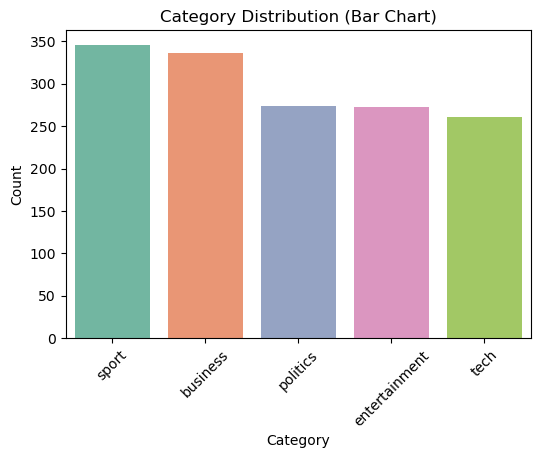

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get category counts
category_counts = data['Category'].value_counts()

# Bar Chart with Different Colors
plt.figure(figsize=(6, 4))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='Set2')
plt.title('Category Distribution (Bar Chart)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

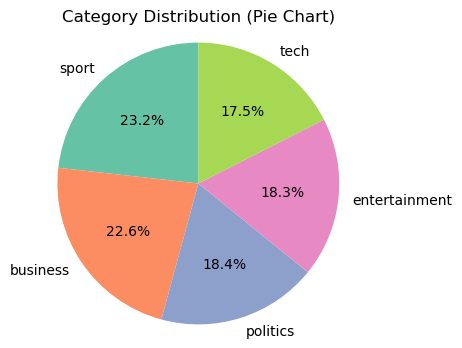

In [8]:
# Pie Chart with Different Colors
plt.figure(figsize=(4, 4))
colors = sns.color_palette('Set2', len(category_counts))  # Choosing a color palette
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Category Distribution (Pie Chart)')
plt.axis('equal')
plt.show()


Average Text Length per Category

Analyzing the average length of articles in each category can help uncover patterns related to verbosity. For example some categories might be more extensive and other shorter, no much to say in some articles but other very dense.

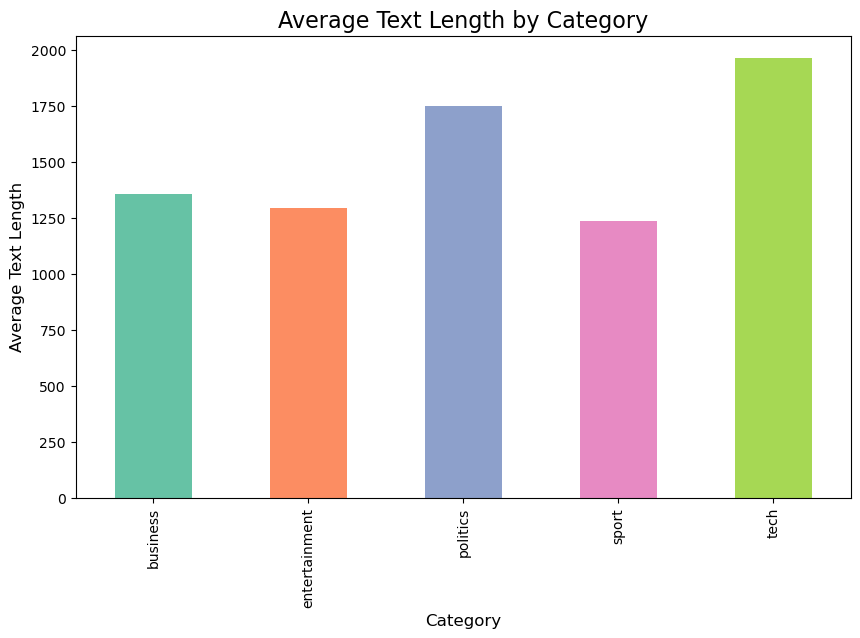

In [9]:
# Average Text Length per Category
data['Text_Length'] = data['processed_text'].apply(len)

avg_text_length = data.groupby('Category')['Text_Length'].mean()

plt.figure(figsize=(10, 6))
avg_text_length.plot(kind='bar', color = colors)
plt.title('Average Text Length by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Text Length', fontsize=12)
plt.show()


In [5]:
# Check unique categories of the data
if 'Category' in data.columns:
    num_categories = data['Category'].nunique()

    print(f"Number of categories in Train Data: {num_categories}")

    print("\nUnique categories in Train Data:", data['Category'].unique())

else:
    print(f"Column '{'Category'}' not found in train or test datasets. Check column names.")

Number of categories in Train Data: 5

Unique categories in Train Data: ['business' 'tech' 'politics' 'sport' 'entertainment']


In [6]:
# # Get counts of each category in data
if 'Category' in data.columns:
    category_counts = data['Category'].value_counts()

    print("Category counts in Train Data:\n" +  str(category_counts))

else:
    print(f"Column '{'Category'}' not found in train or test datasets. Check column names.")

Category counts in Train Data:
Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text to TF-IDF features and create DataFrames to inspect training and test data

tfidf_vectorizer = TfidfVectorizer(
    max_features=5000, # Limit vocabulary to 5000 most important words
    stop_words='english', # Remove common English words (e.g., "the", "is", "and")
    ngram_range=(1, 2) 
)

x = data['processed_text'] 
y = data['Category']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

tfidf_train_df = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_test_df = pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the first few rows of the training dataset
print("The first few rows of the training dataset:\n", tfidf_train_df.head())

# Display the first few rows of the test dataset
print("The first few rows of the test dataset:\n", tfidf_test_df.head())


The first few rows of the training dataset:
    abandoned  abbas  abc  ability      able  abroad  absa  absence  absolute  \
0        0.0    0.0  0.0      0.0  0.040352     0.0   0.0      0.0       0.0   
1        0.0    0.0  0.0      0.0  0.000000     0.0   0.0      0.0       0.0   
2        0.0    0.0  0.0      0.0  0.000000     0.0   0.0      0.0       0.0   
3        0.0    0.0  0.0      0.0  0.000000     0.0   0.0      0.0       0.0   
4        0.0    0.0  0.0      0.0  0.000000     0.0   0.0      0.0       0.0   

   absolutely  ...  younger  youngster  youth  yuan  yugansk  yuganskneftegas  \
0    0.061545  ...      0.0        0.0    0.0   0.0      0.0              0.0   
1    0.000000  ...      0.0        0.0    0.0   0.0      0.0              0.0   
2    0.000000  ...      0.0        0.0    0.0   0.0      0.0              0.0   
3    0.000000  ...      0.0        0.0    0.0   0.0      0.0              0.0   
4    0.000000  ...      0.0        0.0    0.0   0.0      0.0         

In [18]:
from sklearn.model_selection import train_test_split

# splitting the data for the training in different models.
data = data.dropna(subset=['Category'])
x = tfidf_vectorizer.fit_transform(data['processed_text']).toarray() # Recalculate X
y = data['Category']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

### **Step 4 & Step 5: Model Selection and Evaluation Metrics**

(1) using Logistic Regression

Classification Report:
               precision    recall  f1-score   support

     business       0.99      0.97      0.98        75
entertainment       0.96      1.00      0.98        46
     politics       0.96      0.95      0.95        56
        sport       0.95      1.00      0.98        63
         tech       0.98      0.93      0.96        58

     accuracy                           0.97       298
    macro avg       0.97      0.97      0.97       298
 weighted avg       0.97      0.97      0.97       298

Confusion Matrix:


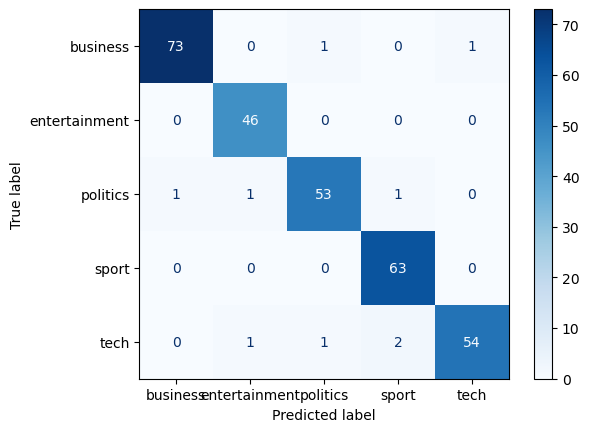

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Logistic Regression uses the sigmoid function.
# it will accept sparce matrix of X, and it accept the y as String.
LG_model = LogisticRegression(max_iter=1000)
LG_model.fit(X_train, y_train)
y_pred = LG_model.predict(X_test)
 
print("Classification Report:")
print(classification_report(y_test, y_pred))

# the classification report.
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LG_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


(2) By using RNN

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

label_encoder = LabelEncoder()

max_words = 5000  # Vocabulary size
max_len = 100     # Maximum sequence length for padding

# it will convert words into integers, Learn all the unique words in this column of text,it will only keep the 5,000 most
#  common words in your text.

tokenizer = Tokenizer(num_words = max_words, oov_token = "<OOV>")
tokenizer.fit_on_texts(data['processed_text'])

# Convert texts to sequences: 
# "maxlen = max_len" Make sure every sequence have length of 100 tokens long.

sequences = tokenizer.texts_to_sequences(data['processed_text'])
X = pad_sequences(sequences, maxlen = max_len)
y = data['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# change the string to the numbers, because the model don't accept strings.
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Build the RNN model.
rnn_model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(128, activation='tanh', return_sequences=True),
    Dropout(0.2),

    LSTM(128, activation='tanh'),
    Dropout(0.1),

    Dense(32, activation='tanh'),
    Dropout(0.2),

    Dense(5, activation='softmax'),
])

# customize the learning rate of adam optimizer.
opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

# by using sparse_categorical_crossentropy, we can directly use the integer labels of y without converting them to one-hot format.
rnn_model.compile(
    optimizer = opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# the model updates its weights every 32 samples of training data rather than updating every epoch.
# running for 10 epochs.
rnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# calculating the accuracy of the model.
test_loss, test_acc = rnn_model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc * 100:.2f}%")

Epoch 1/10


c:\Users\hamza\anaconda3\envs\TPCS2\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


38/38 [==============================] - 10s 155ms/step - loss: 1.4381 - accuracy: 0.3205 - val_loss: 1.0474 - val_accuracy: 0.4866
Epoch 2/10
38/38 [==============================] - 5s 135ms/step - loss: 0.8183 - accuracy: 0.6099 - val_loss: 0.5779 - val_accuracy: 0.7148
Epoch 3/10
38/38 [==============================] - 6s 151ms/step - loss: 0.4448 - accuracy: 0.8062 - val_loss: 0.5518 - val_accuracy: 0.7752
Epoch 4/10
38/38 [==============================] - 7s 176ms/step - loss: 0.2694 - accuracy: 0.9010 - val_loss: 0.5432 - val_accuracy: 0.8658
Epoch 5/10
38/38 [==============================] - 7s 176ms/step - loss: 0.1384 - accuracy: 0.9631 - val_loss: 0.3721 - val_accuracy: 0.8792
Epoch 6/10
38/38 [==============================] - 7s 175ms/step - loss: 0.0702 - accuracy: 0.9857 - val_loss: 0.3954 - val_accuracy: 0.8859
Epoch 7/10
38/38 [==============================] - 7s 177ms/step - loss: 0.0313 - accuracy: 0.9950 - val_loss: 0.3620 - val_accuracy: 0.8993
Epoch 8/10
38/38

(3) By using CNN

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, Dense, Dropout, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

label_encoder = LabelEncoder()

max_words = 5000
max_len = 100

# it will convert words into integers, Learn all the unique words in this column of text,it will only keep the 5,000 most
#  common words in your text.
tokenizer = Tokenizer(num_words = max_words, oov_token = "<OOV>")
tokenizer.fit_on_texts(data['processed_text'])

sequences = tokenizer.texts_to_sequences(data['processed_text'])
X = pad_sequences(sequences, maxlen = max_len)
y = data['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# change the string to the numbers, because the model don't accept strings.
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Build the CNN model.
cnn_model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')  
]) 

# customize the learning rate of adam optimizer.
opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

# by using sparse_categorical_crossentropy, we can directly use the integer labels of y without converting them to one-hot format.
cnn_model.compile(optimizer= opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# running for 8 epochs.
cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=8, batch_size=32)

# calculating the accuracy of the model.
test_loss, test_acc = cnn_model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc * 100:.2f}%")

Epoch 1/8


c:\Users\hamza\anaconda3\envs\TPCS2\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


38/38 [==============================] - 3s 53ms/step - loss: 1.5779 - accuracy: 0.3716 - val_loss: 1.5215 - val_accuracy: 0.3960
Epoch 2/8
38/38 [==============================] - 2s 47ms/step - loss: 1.2410 - accuracy: 0.7257 - val_loss: 0.9297 - val_accuracy: 0.7483
Epoch 3/8
38/38 [==============================] - 2s 48ms/step - loss: 0.4720 - accuracy: 0.9119 - val_loss: 0.3525 - val_accuracy: 0.9161
Epoch 4/8
38/38 [==============================] - 2s 47ms/step - loss: 0.0990 - accuracy: 0.9891 - val_loss: 0.2139 - val_accuracy: 0.9329
Epoch 5/8
38/38 [==============================] - 2s 48ms/step - loss: 0.0249 - accuracy: 1.0000 - val_loss: 0.1836 - val_accuracy: 0.9463
Epoch 6/8
38/38 [==============================] - 2s 48ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.1747 - val_accuracy: 0.9430
Epoch 7/8
38/38 [==============================] - 2s 48ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.1665 - val_accuracy: 0.9463
Epoch 8/8
38/38 [=============

(4) By using XGBoost

In [19]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# XGBoost accept the sparce matrix of X, but it cannet accept the string values in y, that why we encode them.
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# XGBoost model, classification model.
xgbc_model = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=500, objective='multi:softmax', booster='gbtree')
xgbc_model.fit(X_train,y_train)

# the classification report:
y_pred = xgbc_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        75
           1       0.98      0.98      0.98        46
           2       0.92      0.96      0.94        56
           3       1.00      0.98      0.99        63
           4       0.98      0.90      0.94        58

    accuracy                           0.96       298
   macro avg       0.96      0.96      0.96       298
weighted avg       0.96      0.96      0.96       298



(5) By using RandomForestClassifier

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# XGBoost accept the sparce matrix of X, and it accept the string values in y.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
# the classification report:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        75
           1       0.98      0.98      0.98        46
           2       0.96      0.96      0.96        56
           3       0.98      1.00      0.99        63
           4       1.00      0.93      0.96        58

    accuracy                           0.97       298
   macro avg       0.98      0.97      0.97       298
weighted avg       0.97      0.97      0.97       298



### **An example of the code**


**(1) example for the Logistic Regression**

using tfidf_vectorizer

In [19]:
# this an example of BBC news article that I tried it.
text = "As a football-obsessed child with an allergy to horses, Sean Bowen did not seem like obvious jockey material. That is despite Bowen's parents, Peter and Karen, having trained racehorses for many years. But at the age of 27, Bowen rode his 1,000th winner in February, and now he is searching for Grand National success. Bowen rides 20-1 shot Three Card Brag for Irish trainer Gordon Elliott at Aintree on Saturday.Ive always grown up loving the Grand National and Dad loves the Grand National. Its something that he always said that hopefully one day he could win, Bowen says. Id love to win a Grand National for my family. If I did that, I think Id have to retire because there's not much else that can top that."
text_first = clean_text(text)

text_seconed = preprocess_text(text_first)
text_third = tfidf_vectorizer.transform([text_seconed]).toarray()
LG =  LG_model.predict(text_third)
print("The category of the text:", LG[0])

The category of the text: sport


**(2) example for RNN**

using sequences

In [ ]:
text = "As a football-obsessed child with an allergy to horses, Sean Bowen did not seem like obvious jockey material. That is despite Bowen's parents, Peter and Karen, having trained racehorses for many years. But at the age of 27, Bowen rode his 1,000th winner in February, and now he is searching for Grand National success. Bowen rides 20-1 shot Three Card Brag for Irish trainer Gordon Elliott at Aintree on Saturday.Ive always grown up loving the Grand National and Dad loves the Grand National. Its something that he always said that hopefully one day he could win, Bowen says. Id love to win a Grand National for my family. If I did that, I think Id have to retire because there's not much else that can top that."
text_first = clean_text(text)
text_seconed = preprocess_text(text_first)
text_third =  pad_sequences(tokenizer.texts_to_sequences([text_seconed]), maxlen = max_len)

RNN =  rnn_model.predict(text_third)

predicted_label = label_encoder.inverse_transform([RNN.argmax()])[0]
print(f"The category of the text: {predicted_label}")

1/1 [==============================] - 2s 2s/step
The category of the text: 3


**(3) example of CNN**

using sequance

In [ ]:
text = "As a football-obsessed child with an allergy to horses, Sean Bowen did not seem like obvious jockey material. That is despite Bowen's parents, Peter and Karen, having trained racehorses for many years. But at the age of 27, Bowen rode his 1,000th winner in February, and now he is searching for Grand National success. Bowen rides 20-1 shot Three Card Brag for Irish trainer Gordon Elliott at Aintree on Saturday.Ive always grown up loving the Grand National and Dad loves the Grand National. Its something that he always said that hopefully one day he could win, Bowen says. Id love to win a Grand National for my family. If I did that, I think Id have to retire because there's not much else that can top that."
text_first = clean_text(text)
text_seconed = preprocess_text(text_first)
text_third =  pad_sequences(tokenizer.texts_to_sequences([text_seconed]), maxlen = max_len)

CNN =  cnn_model.predict(text_third)

predicted_label = label_encoder.inverse_transform([CNN.argmax()])[0]
print(f"The category of the text: {predicted_label}")

1/1 [==============================] - 0s 137ms/step
The category of the text: 3


**(4) example of XGBoost**

using tfidf_vectorizer

In [10]:
text = "As a football-obsessed child with an allergy to horses, Sean Bowen did not seem like obvious jockey material. That is despite Bowen's parents, Peter and Karen, having trained racehorses for many years. But at the age of 27, Bowen rode his 1,000th winner in February, and now he is searching for Grand National success. Bowen rides 20-1 shot Three Card Brag for Irish trainer Gordon Elliott at Aintree on Saturday.Ive always grown up loving the Grand National and Dad loves the Grand National. Its something that he always said that hopefully one day he could win, Bowen says. Id love to win a Grand National for my family. If I did that, I think Id have to retire because there's not much else that can top that."
text_first = clean_text(text)

text_seconed = preprocess_text(text_first)
text_third = tfidf_vectorizer.transform([text_seconed]).toarray()
XGB =  xgbc_model.predict(text_third)
print("The category of the text:", XGB[0])

The category of the text: 3


**(5) example of RandomForestClassifier**

using tfidf_vectorizer

In [13]:
text = "As a football-obsessed child with an allergy to horses, Sean Bowen did not seem like obvious jockey material. That is despite Bowen's parents, Peter and Karen, having trained racehorses for many years. But at the age of 27, Bowen rode his 1,000th winner in February, and now he is searching for Grand National success. Bowen rides 20-1 shot Three Card Brag for Irish trainer Gordon Elliott at Aintree on Saturday.Ive always grown up loving the Grand National and Dad loves the Grand National. Its something that he always said that hopefully one day he could win, Bowen says. Id love to win a Grand National for my family. If I did that, I think Id have to retire because there's not much else that can top that."
text_first = clean_text(text)

text_seconed = preprocess_text(text_first)
text_third = tfidf_vectorizer.transform([text_seconed]).toarray()
RF =  rf_model.predict(text_third)
print("The category of the text:", RF[0])

The category of the text: 3
